# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from hyperopt import hp,Trials,fmin,tpe,STATUS_OK

# Loading Dataset

In [4]:
df = pd.read_csv(r'C:\Programacion\Datasets\mobiles\train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

In [8]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Balance del target')

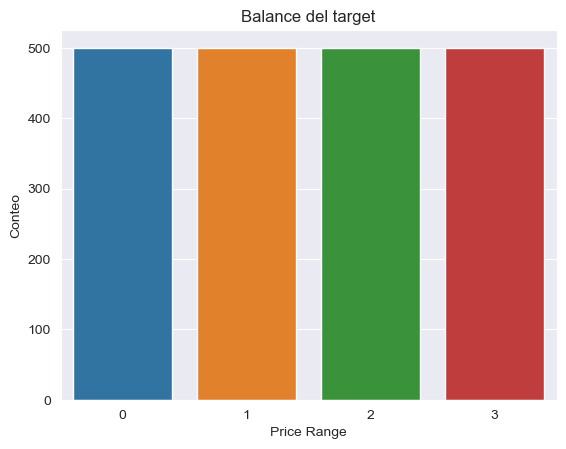

In [9]:
sns.countplot(x=df.price_range)
plt.ylabel('Conteo')
plt.xlabel('Price Range')
plt.title('Balance del target')

In [5]:
labels = ['Small Size','Medium Size','Big Size']
bins= [500,1000,1500,2000]
df['Battery_Power_Classification'] = pd.cut(df.battery_power,bins=bins,labels=labels)

<Axes: xlabel='Capacidad de la bateria', ylabel='Frecuencia'>

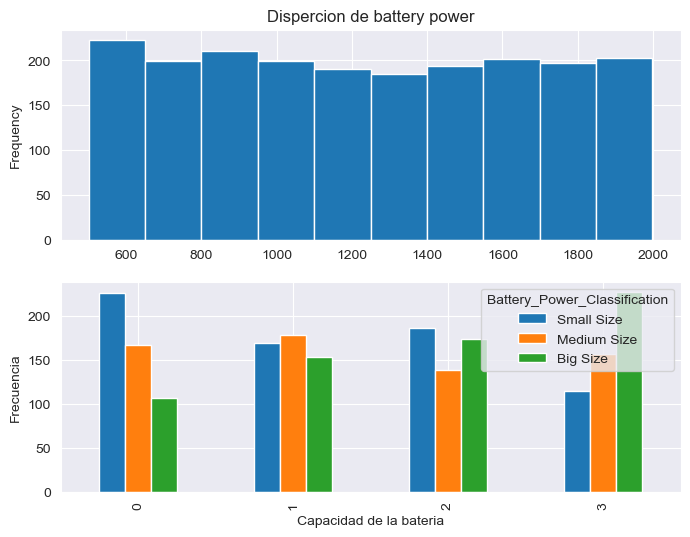

In [20]:
fig1,ax1 = plt.subplots(2,1,figsize=(8,6))
df.battery_power.plot(kind='hist',ax=ax1[0],ylabel='Frecuencia',title='Dispercion de battery power')
df.groupby('price_range')['Battery_Power_Classification'].value_counts().unstack().plot(kind='bar',ax=ax1[1],xlabel='Capacidad de la bateria',ylabel='Frecuencia',title='Dispercion de battery power')

Text(0.5, 0, 'Rangos de Precio')

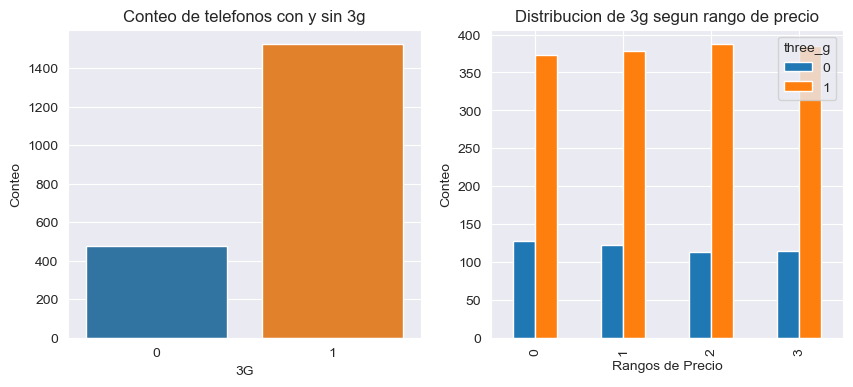

In [25]:
fig2, ax2 = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x=df.three_g,ax=ax2[0])
ax2[0].set_title('Conteo de telefonos con y sin 3g')
ax2[0].set_ylabel('Conteo')
ax2[0].set_xlabel('3G')
df.groupby('price_range')['three_g'].value_counts().unstack().plot.bar(ax=ax2[1])
ax2[1].set_title('Distribucion de 3g segun rango de precio')
ax2[1].set_ylabel('Conteo')
ax2[1].set_xlabel('Rangos de Precio')

Text(0.5, 0, 'Rangos de Precio')

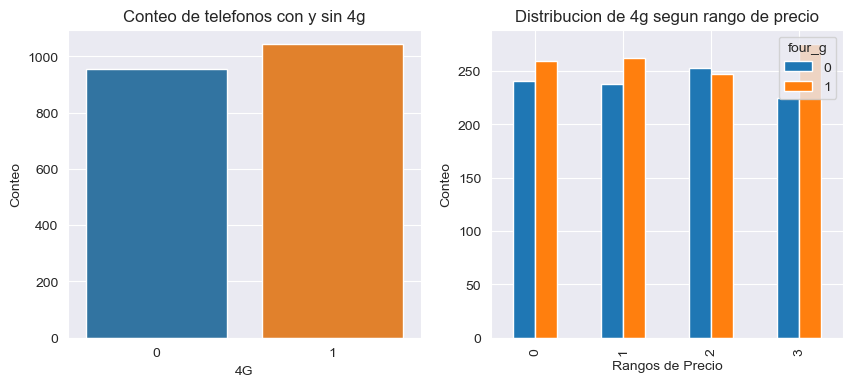

In [24]:
fig2, ax2 = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x=df.four_g,ax=ax2[0])
ax2[0].set_title('Conteo de telefonos con y sin 4g')
ax2[0].set_ylabel('Conteo')
ax2[0].set_xlabel('4G')
df.groupby('price_range')['four_g'].value_counts().unstack().plot.bar(ax=ax2[1])
ax2[1].set_title('Distribucion de 4g segun rango de precio')
ax2[1].set_ylabel('Conteo')
ax2[1].set_xlabel('Rangos de Precio')

Text(0, 0.5, 'Ram')

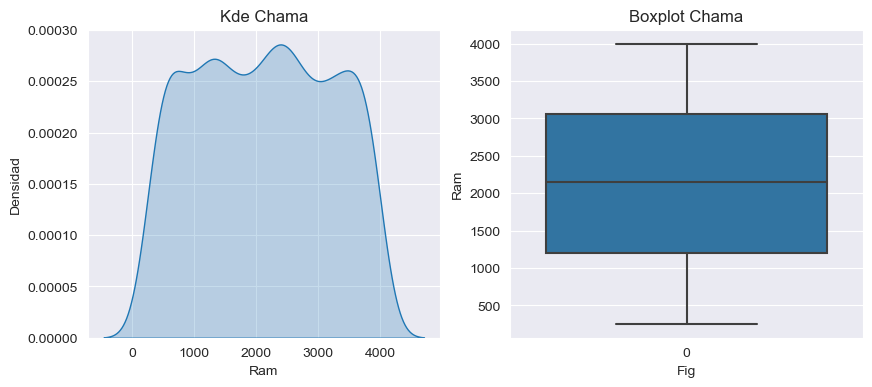

In [44]:
fig3,ax3 = plt.subplots(1,2,figsize=(10,4))
sns.kdeplot(df.ram,fill=True,ax=ax3[0])
ax3[0].set_title('Kde Chama')
ax3[0].set_xlabel('Ram')
ax3[0].set_ylabel('Densidad')

sns.boxplot(df.ram,ax=ax3[1])
ax3[1].set_title('Boxplot Chama')
ax3[1].set_xlabel('Fig')
ax3[1].set_ylabel('Ram')

<Axes: xlabel='price_range', ylabel='ram'>

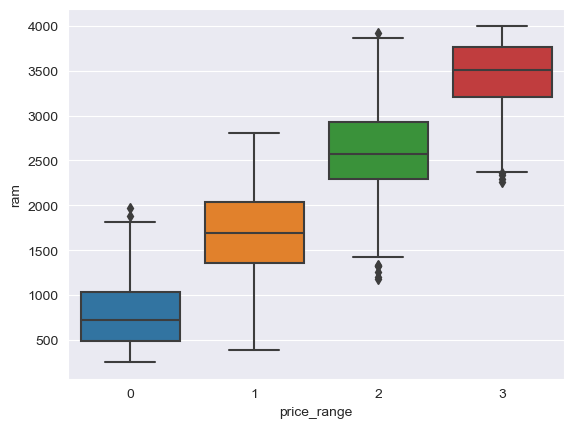

In [45]:
sns.boxplot(x=df.price_range,y=df.ram)

Text(0.5, 1.0, 'Big Size Battery')

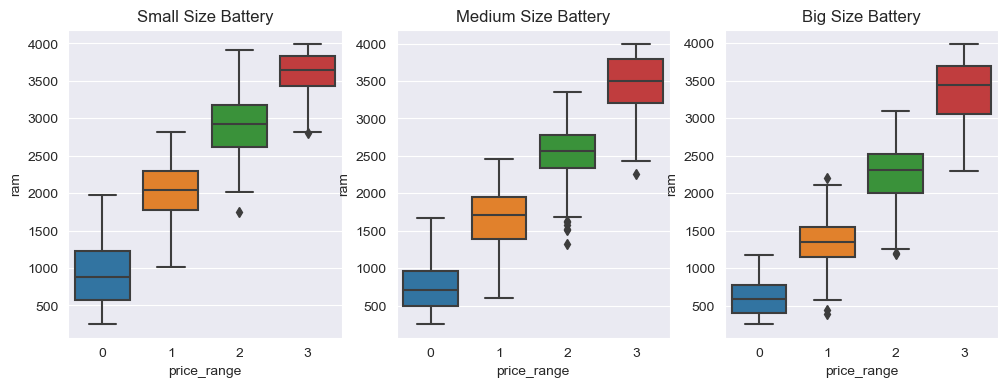

In [54]:
fig4,ax4 = plt.subplots(1,3,figsize=(12,4))
sns.boxplot(data=df.loc[df['Battery_Power_Classification']=='Small Size'],x='price_range',y='ram',ax=ax4[0])
ax4[0].set_title('Small Size Battery')
sns.boxplot(data=df.loc[df['Battery_Power_Classification']=='Medium Size'],x='price_range',y='ram',ax=ax4[1])
ax4[1].set_title('Medium Size Battery')
sns.boxplot(data=df.loc[df['Battery_Power_Classification']=='Big Size'],x='price_range',y='ram',ax=ax4[2])
ax4[2].set_title('Big Size Battery')

# ML

In [6]:
X = df.drop(['price_range','Battery_Power_Classification'],axis=1)
y = df.price_range
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Hyperopt

In [7]:
from sklearn import metrics

In [10]:
space= {'max_depth':hp.quniform('max_depth',1,15,1),'n_estimators':hp.quniform('n_estimators',50,150,1),'subsample':hp.uniform('subsample',0,1),'learning_rate':hp.uniform('learning_rate',0.1,1)}
def objective(space):
    model = XGBClassifier(max_depth=int(space['max_depth']),n_estimators=int(space['n_estimators']),subsample=space['subsample'],learning_rate=space['learning_rate'])
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    model.fit(X_train, y_train,eval_set=evaluation)
    pred = model.predict(X_test)
    f1 = metrics.f1_score(y_test, pred,average='weighted')
    return {'loss': -f1, 'status': STATUS_OK }
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[0]	validation_0-mlogloss:0.44853	validation_1-mlogloss:0.59714
[1]	validation_0-mlogloss:0.23458	validation_1-mlogloss:0.46354
[2]	validation_0-mlogloss:0.14083	validation_1-mlogloss:0.39778
[3]	validation_0-mlogloss:0.09324	validation_1-mlogloss:0.38193
[4]	validation_0-mlogloss:0.06405	validation_1-mlogloss:0.37586
[5]	validation_0-mlogloss:0.04818	validation_1-mlogloss:0.36656
[6]	validation_0-mlogloss:0.03718	validation_1-mlogloss:0.35700
[7]	validation_0-mlogloss:0.03012	validation_1-mlogloss:0.34756
[8]	validation_0-mlogloss:0.02541	validation_1-mlogloss:0.35169
[9]	validation_0-mlogloss:0.02168	validation_1-mlogloss:0.34913
[10]	validation_0-mlogloss:0.01880	validation_1-mlogloss:0.33968
[11]	validation_0-mlogloss:0.01689	validation_1-mlogloss:0.34024
[12]	validation_0-mlogloss:0.01532	validation_1-mlogloss:0.33690
[13]	validation_0-mlogloss:0.01412	validation_1-mlogloss:0.34007
[14]	validation_0-mlogloss:0.01298	validation_1-mlogloss:0.34133
[15]	validation_0-mlogloss:0.01187	

[85]	validation_0-mlogloss:0.19304	validation_1-mlogloss:0.29766                  
[86]	validation_0-mlogloss:0.19100	validation_1-mlogloss:0.29865                  
[87]	validation_0-mlogloss:0.18875	validation_1-mlogloss:0.29768                  
[88]	validation_0-mlogloss:0.18772	validation_1-mlogloss:0.29441                  
[89]	validation_0-mlogloss:0.18610	validation_1-mlogloss:0.29411                  
[90]	validation_0-mlogloss:0.18403	validation_1-mlogloss:0.29226                  
[91]	validation_0-mlogloss:0.18260	validation_1-mlogloss:0.29339                  
[92]	validation_0-mlogloss:0.18089	validation_1-mlogloss:0.29325                  
[93]	validation_0-mlogloss:0.18032	validation_1-mlogloss:0.29366                  
[94]	validation_0-mlogloss:0.17882	validation_1-mlogloss:0.29134                  
[95]	validation_0-mlogloss:0.17786	validation_1-mlogloss:0.28848                  
[96]	validation_0-mlogloss:0.17685	validation_1-mlogloss:0.28703                  
[97]

[88]	validation_0-mlogloss:0.11913	validation_1-mlogloss:0.26641                  
[89]	validation_0-mlogloss:0.11854	validation_1-mlogloss:0.26475                  
[90]	validation_0-mlogloss:0.11734	validation_1-mlogloss:0.26916                  
[91]	validation_0-mlogloss:0.11526	validation_1-mlogloss:0.26258                  
[92]	validation_0-mlogloss:0.11399	validation_1-mlogloss:0.26143                  
[93]	validation_0-mlogloss:0.11311	validation_1-mlogloss:0.26348                  
[94]	validation_0-mlogloss:0.11162	validation_1-mlogloss:0.25911                  
[95]	validation_0-mlogloss:0.11090	validation_1-mlogloss:0.26097                  
[96]	validation_0-mlogloss:0.10911	validation_1-mlogloss:0.26060                  
[97]	validation_0-mlogloss:0.10854	validation_1-mlogloss:0.26076                  
[98]	validation_0-mlogloss:0.10746	validation_1-mlogloss:0.26093                  
[99]	validation_0-mlogloss:0.10672	validation_1-mlogloss:0.26279                  
[100

[44]	validation_0-mlogloss:0.08525	validation_1-mlogloss:0.27041                  
[45]	validation_0-mlogloss:0.08333	validation_1-mlogloss:0.27195                  
[46]	validation_0-mlogloss:0.08057	validation_1-mlogloss:0.27052                  
[47]	validation_0-mlogloss:0.07860	validation_1-mlogloss:0.27002                  
[48]	validation_0-mlogloss:0.07627	validation_1-mlogloss:0.26902                  
[49]	validation_0-mlogloss:0.07423	validation_1-mlogloss:0.26750                  
[50]	validation_0-mlogloss:0.07217	validation_1-mlogloss:0.26684                  
[51]	validation_0-mlogloss:0.07008	validation_1-mlogloss:0.26450                  
[52]	validation_0-mlogloss:0.06850	validation_1-mlogloss:0.26331                  
[53]	validation_0-mlogloss:0.06727	validation_1-mlogloss:0.26298                  
[54]	validation_0-mlogloss:0.06589	validation_1-mlogloss:0.26277                  
[55]	validation_0-mlogloss:0.06447	validation_1-mlogloss:0.26350                  
[56]

[21]	validation_0-mlogloss:0.00776	validation_1-mlogloss:0.28510                  
[22]	validation_0-mlogloss:0.00740	validation_1-mlogloss:0.28577                  
[23]	validation_0-mlogloss:0.00712	validation_1-mlogloss:0.28703                  
[24]	validation_0-mlogloss:0.00685	validation_1-mlogloss:0.28784                  
[25]	validation_0-mlogloss:0.00665	validation_1-mlogloss:0.28590                  
[26]	validation_0-mlogloss:0.00638	validation_1-mlogloss:0.28627                  
[27]	validation_0-mlogloss:0.00622	validation_1-mlogloss:0.28446                  
[28]	validation_0-mlogloss:0.00602	validation_1-mlogloss:0.28593                  
[29]	validation_0-mlogloss:0.00585	validation_1-mlogloss:0.28598                  
[30]	validation_0-mlogloss:0.00568	validation_1-mlogloss:0.28527                  
[31]	validation_0-mlogloss:0.00554	validation_1-mlogloss:0.28669                  
[32]	validation_0-mlogloss:0.00537	validation_1-mlogloss:0.28853                  
[33]

[27]	validation_0-mlogloss:0.01563	validation_1-mlogloss:0.30321                  
[28]	validation_0-mlogloss:0.01508	validation_1-mlogloss:0.30161                  
[29]	validation_0-mlogloss:0.01497	validation_1-mlogloss:0.30062                  
[30]	validation_0-mlogloss:0.01447	validation_1-mlogloss:0.30267                  
[31]	validation_0-mlogloss:0.01374	validation_1-mlogloss:0.30233                  
[32]	validation_0-mlogloss:0.01332	validation_1-mlogloss:0.30296                  
[33]	validation_0-mlogloss:0.01282	validation_1-mlogloss:0.30111                  
[34]	validation_0-mlogloss:0.01227	validation_1-mlogloss:0.30469                  
[35]	validation_0-mlogloss:0.01199	validation_1-mlogloss:0.30659                  
[36]	validation_0-mlogloss:0.01164	validation_1-mlogloss:0.30891                  
[37]	validation_0-mlogloss:0.01122	validation_1-mlogloss:0.31338                  
[38]	validation_0-mlogloss:0.01093	validation_1-mlogloss:0.31528                  
[39]

[89]	validation_0-mlogloss:0.03667	validation_1-mlogloss:0.21694                   
[90]	validation_0-mlogloss:0.03586	validation_1-mlogloss:0.21683                   
[91]	validation_0-mlogloss:0.03517	validation_1-mlogloss:0.21507                   
[92]	validation_0-mlogloss:0.03451	validation_1-mlogloss:0.21450                   
[93]	validation_0-mlogloss:0.03370	validation_1-mlogloss:0.21412                   
[94]	validation_0-mlogloss:0.03303	validation_1-mlogloss:0.21335                   
[95]	validation_0-mlogloss:0.03232	validation_1-mlogloss:0.21261                   
[96]	validation_0-mlogloss:0.03153	validation_1-mlogloss:0.21238                   
[97]	validation_0-mlogloss:0.03093	validation_1-mlogloss:0.21227                   
[98]	validation_0-mlogloss:0.03049	validation_1-mlogloss:0.21121                   
[99]	validation_0-mlogloss:0.02991	validation_1-mlogloss:0.21164                   
[100]	validation_0-mlogloss:0.02944	validation_1-mlogloss:0.21116           

[43]	validation_0-mlogloss:0.34543	validation_1-mlogloss:0.42061                   
[44]	validation_0-mlogloss:0.34105	validation_1-mlogloss:0.41705                   
[45]	validation_0-mlogloss:0.33490	validation_1-mlogloss:0.41197                   
[46]	validation_0-mlogloss:0.33026	validation_1-mlogloss:0.40798                   
[47]	validation_0-mlogloss:0.32377	validation_1-mlogloss:0.40277                   
[48]	validation_0-mlogloss:0.31868	validation_1-mlogloss:0.39753                   
[49]	validation_0-mlogloss:0.31519	validation_1-mlogloss:0.39617                   
[50]	validation_0-mlogloss:0.30989	validation_1-mlogloss:0.39102                   
[51]	validation_0-mlogloss:0.30665	validation_1-mlogloss:0.38825                   
[52]	validation_0-mlogloss:0.30121	validation_1-mlogloss:0.38392                   
[53]	validation_0-mlogloss:0.29674	validation_1-mlogloss:0.37957                   
[54]	validation_0-mlogloss:0.29286	validation_1-mlogloss:0.37663            

[1]	validation_0-mlogloss:0.29114	validation_1-mlogloss:0.43638                    
[2]	validation_0-mlogloss:0.21707	validation_1-mlogloss:0.41906                    
[3]	validation_0-mlogloss:0.16220	validation_1-mlogloss:0.39253                    
[4]	validation_0-mlogloss:0.12333	validation_1-mlogloss:0.38308                    
[5]	validation_0-mlogloss:0.10247	validation_1-mlogloss:0.37476                    
[6]	validation_0-mlogloss:0.08364	validation_1-mlogloss:0.36235                    
[7]	validation_0-mlogloss:0.07002	validation_1-mlogloss:0.35386                    
[8]	validation_0-mlogloss:0.05822	validation_1-mlogloss:0.34327                    
[9]	validation_0-mlogloss:0.04891	validation_1-mlogloss:0.34629                    
[10]	validation_0-mlogloss:0.04169	validation_1-mlogloss:0.33539                   
[11]	validation_0-mlogloss:0.03728	validation_1-mlogloss:0.33477                   
[12]	validation_0-mlogloss:0.03295	validation_1-mlogloss:0.33538            

[45]	validation_0-mlogloss:0.08818	validation_1-mlogloss:0.24321                   
[46]	validation_0-mlogloss:0.08479	validation_1-mlogloss:0.24047                   
[47]	validation_0-mlogloss:0.08244	validation_1-mlogloss:0.23928                   
[48]	validation_0-mlogloss:0.08043	validation_1-mlogloss:0.23822                   
[49]	validation_0-mlogloss:0.07823	validation_1-mlogloss:0.23454                   
[50]	validation_0-mlogloss:0.07619	validation_1-mlogloss:0.23452                   
[51]	validation_0-mlogloss:0.07386	validation_1-mlogloss:0.23122                   
[52]	validation_0-mlogloss:0.07196	validation_1-mlogloss:0.23072                   
[53]	validation_0-mlogloss:0.07026	validation_1-mlogloss:0.23275                   
[54]	validation_0-mlogloss:0.06880	validation_1-mlogloss:0.23143                   
[55]	validation_0-mlogloss:0.06742	validation_1-mlogloss:0.23018                   
[56]	validation_0-mlogloss:0.06572	validation_1-mlogloss:0.22864            

[100]	validation_0-mlogloss:0.00624	validation_1-mlogloss:0.29774                  
[101]	validation_0-mlogloss:0.00621	validation_1-mlogloss:0.29888                  
[102]	validation_0-mlogloss:0.00615	validation_1-mlogloss:0.29773                  
[103]	validation_0-mlogloss:0.00613	validation_1-mlogloss:0.29558                  
[104]	validation_0-mlogloss:0.00610	validation_1-mlogloss:0.29531                  
[105]	validation_0-mlogloss:0.00607	validation_1-mlogloss:0.29666                  
[106]	validation_0-mlogloss:0.00605	validation_1-mlogloss:0.29746                  
[107]	validation_0-mlogloss:0.00601	validation_1-mlogloss:0.30071                  
[108]	validation_0-mlogloss:0.00598	validation_1-mlogloss:0.29904                  
[109]	validation_0-mlogloss:0.00596	validation_1-mlogloss:0.30069                  
[110]	validation_0-mlogloss:0.00593	validation_1-mlogloss:0.30170                  
[111]	validation_0-mlogloss:0.00588	validation_1-mlogloss:0.30271           

[81]	validation_0-mlogloss:0.01644	validation_1-mlogloss:0.25971                   
[82]	validation_0-mlogloss:0.01621	validation_1-mlogloss:0.26120                   
[83]	validation_0-mlogloss:0.01598	validation_1-mlogloss:0.25945                   
[84]	validation_0-mlogloss:0.01577	validation_1-mlogloss:0.25862                   
[85]	validation_0-mlogloss:0.01558	validation_1-mlogloss:0.25970                   
[86]	validation_0-mlogloss:0.01535	validation_1-mlogloss:0.26043                   
[87]	validation_0-mlogloss:0.01517	validation_1-mlogloss:0.26254                   
[88]	validation_0-mlogloss:0.01495	validation_1-mlogloss:0.26183                   
[89]	validation_0-mlogloss:0.01474	validation_1-mlogloss:0.26046                   
[90]	validation_0-mlogloss:0.01459	validation_1-mlogloss:0.26028                   
[91]	validation_0-mlogloss:0.01433	validation_1-mlogloss:0.25877                   
[92]	validation_0-mlogloss:0.01419	validation_1-mlogloss:0.26008            

[73]	validation_0-mlogloss:0.01659	validation_1-mlogloss:0.22330                   
[74]	validation_0-mlogloss:0.01626	validation_1-mlogloss:0.22297                   
[75]	validation_0-mlogloss:0.01594	validation_1-mlogloss:0.22264                   
[76]	validation_0-mlogloss:0.01566	validation_1-mlogloss:0.22281                   
[77]	validation_0-mlogloss:0.01537	validation_1-mlogloss:0.22272                   
[78]	validation_0-mlogloss:0.01509	validation_1-mlogloss:0.22295                   
[79]	validation_0-mlogloss:0.01483	validation_1-mlogloss:0.22281                   
[80]	validation_0-mlogloss:0.01459	validation_1-mlogloss:0.22282                   
[81]	validation_0-mlogloss:0.01433	validation_1-mlogloss:0.22242                   
[82]	validation_0-mlogloss:0.01410	validation_1-mlogloss:0.22280                   
[83]	validation_0-mlogloss:0.01388	validation_1-mlogloss:0.22303                   
[84]	validation_0-mlogloss:0.01367	validation_1-mlogloss:0.22285            

[28]	validation_0-mlogloss:0.00527	validation_1-mlogloss:0.26217                   
[29]	validation_0-mlogloss:0.00508	validation_1-mlogloss:0.25986                   
[30]	validation_0-mlogloss:0.00493	validation_1-mlogloss:0.26132                   
[31]	validation_0-mlogloss:0.00482	validation_1-mlogloss:0.26225                   
[32]	validation_0-mlogloss:0.00473	validation_1-mlogloss:0.26289                   
[33]	validation_0-mlogloss:0.00463	validation_1-mlogloss:0.26474                   
[34]	validation_0-mlogloss:0.00454	validation_1-mlogloss:0.26521                   
[35]	validation_0-mlogloss:0.00445	validation_1-mlogloss:0.26587                   
[36]	validation_0-mlogloss:0.00434	validation_1-mlogloss:0.26723                   
[37]	validation_0-mlogloss:0.00426	validation_1-mlogloss:0.26687                   
[38]	validation_0-mlogloss:0.00418	validation_1-mlogloss:0.26696                   
[39]	validation_0-mlogloss:0.00411	validation_1-mlogloss:0.26834            

[61]	validation_0-mlogloss:0.00382	validation_1-mlogloss:0.27968                   
[62]	validation_0-mlogloss:0.00380	validation_1-mlogloss:0.27878                   
[63]	validation_0-mlogloss:0.00376	validation_1-mlogloss:0.27959                   
[64]	validation_0-mlogloss:0.00373	validation_1-mlogloss:0.27998                   
[65]	validation_0-mlogloss:0.00370	validation_1-mlogloss:0.27979                   
[66]	validation_0-mlogloss:0.00367	validation_1-mlogloss:0.27850                   
[67]	validation_0-mlogloss:0.00364	validation_1-mlogloss:0.27797                   
[68]	validation_0-mlogloss:0.00362	validation_1-mlogloss:0.27850                   
[69]	validation_0-mlogloss:0.00359	validation_1-mlogloss:0.27860                   
[70]	validation_0-mlogloss:0.00356	validation_1-mlogloss:0.27887                   
[71]	validation_0-mlogloss:0.00354	validation_1-mlogloss:0.27821                   
[72]	validation_0-mlogloss:0.00351	validation_1-mlogloss:0.27848            

[43]	validation_0-mlogloss:0.00938	validation_1-mlogloss:0.25445                   
[44]	validation_0-mlogloss:0.00924	validation_1-mlogloss:0.25512                   
[45]	validation_0-mlogloss:0.00903	validation_1-mlogloss:0.25387                   
[46]	validation_0-mlogloss:0.00885	validation_1-mlogloss:0.25394                   
[47]	validation_0-mlogloss:0.00870	validation_1-mlogloss:0.25432                   
[48]	validation_0-mlogloss:0.00855	validation_1-mlogloss:0.25386                   
[49]	validation_0-mlogloss:0.00840	validation_1-mlogloss:0.25473                   
[50]	validation_0-mlogloss:0.00824	validation_1-mlogloss:0.25462                   
[51]	validation_0-mlogloss:0.00806	validation_1-mlogloss:0.25490                   
[52]	validation_0-mlogloss:0.00790	validation_1-mlogloss:0.25551                   
[53]	validation_0-mlogloss:0.00779	validation_1-mlogloss:0.25480                   
[54]	validation_0-mlogloss:0.00766	validation_1-mlogloss:0.25485            

[1]	validation_0-mlogloss:0.72473	validation_1-mlogloss:0.75140                    
[2]	validation_0-mlogloss:0.62090	validation_1-mlogloss:0.65613                    
[3]	validation_0-mlogloss:0.55911	validation_1-mlogloss:0.60157                    
[4]	validation_0-mlogloss:0.51498	validation_1-mlogloss:0.56293                    
[5]	validation_0-mlogloss:0.46506	validation_1-mlogloss:0.51497                    
[6]	validation_0-mlogloss:0.41978	validation_1-mlogloss:0.47471                    
[7]	validation_0-mlogloss:0.39027	validation_1-mlogloss:0.45272                    
[8]	validation_0-mlogloss:0.35730	validation_1-mlogloss:0.42341                    
[9]	validation_0-mlogloss:0.33314	validation_1-mlogloss:0.40427                    
[10]	validation_0-mlogloss:0.31339	validation_1-mlogloss:0.39111                   
[11]	validation_0-mlogloss:0.29754	validation_1-mlogloss:0.37675                   
[12]	validation_0-mlogloss:0.28123	validation_1-mlogloss:0.36516            

[72]	validation_0-mlogloss:0.00548	validation_1-mlogloss:0.23886                   
[73]	validation_0-mlogloss:0.00543	validation_1-mlogloss:0.23967                   
[74]	validation_0-mlogloss:0.00537	validation_1-mlogloss:0.23876                   
[75]	validation_0-mlogloss:0.00531	validation_1-mlogloss:0.23882                   
[76]	validation_0-mlogloss:0.00527	validation_1-mlogloss:0.23919                   
[77]	validation_0-mlogloss:0.00521	validation_1-mlogloss:0.24012                   
[78]	validation_0-mlogloss:0.00516	validation_1-mlogloss:0.24042                   
[79]	validation_0-mlogloss:0.00512	validation_1-mlogloss:0.23986                   
[80]	validation_0-mlogloss:0.00508	validation_1-mlogloss:0.24016                   
[81]	validation_0-mlogloss:0.00503	validation_1-mlogloss:0.23940                   
[82]	validation_0-mlogloss:0.00498	validation_1-mlogloss:0.23913                   
[83]	validation_0-mlogloss:0.00493	validation_1-mlogloss:0.23849            

[143]	validation_0-mlogloss:0.00883	validation_1-mlogloss:0.23831                  
[144]	validation_0-mlogloss:0.00875	validation_1-mlogloss:0.23812                  
[145]	validation_0-mlogloss:0.00869	validation_1-mlogloss:0.23804                  
[146]	validation_0-mlogloss:0.00864	validation_1-mlogloss:0.23788                  
[147]	validation_0-mlogloss:0.00860	validation_1-mlogloss:0.23810                  
[148]	validation_0-mlogloss:0.00857	validation_1-mlogloss:0.23740                  
[0]	validation_0-mlogloss:1.27794	validation_1-mlogloss:1.28231                    
[1]	validation_0-mlogloss:1.18857	validation_1-mlogloss:1.19590                    
[2]	validation_0-mlogloss:1.11326	validation_1-mlogloss:1.12383                    
[3]	validation_0-mlogloss:1.05107	validation_1-mlogloss:1.06423                    
[4]	validation_0-mlogloss:0.99517	validation_1-mlogloss:1.01032                    
[5]	validation_0-mlogloss:0.94651	validation_1-mlogloss:0.96528             

[78]	validation_0-mlogloss:0.00315	validation_1-mlogloss:0.26613                   
[79]	validation_0-mlogloss:0.00313	validation_1-mlogloss:0.26548                   
[80]	validation_0-mlogloss:0.00311	validation_1-mlogloss:0.26566                   
[81]	validation_0-mlogloss:0.00309	validation_1-mlogloss:0.26628                   
[82]	validation_0-mlogloss:0.00307	validation_1-mlogloss:0.26686                   
[83]	validation_0-mlogloss:0.00304	validation_1-mlogloss:0.26713                   
[84]	validation_0-mlogloss:0.00302	validation_1-mlogloss:0.26658                   
[85]	validation_0-mlogloss:0.00301	validation_1-mlogloss:0.26650                   
[86]	validation_0-mlogloss:0.00299	validation_1-mlogloss:0.26663                   
[87]	validation_0-mlogloss:0.00297	validation_1-mlogloss:0.26791                   
[88]	validation_0-mlogloss:0.00296	validation_1-mlogloss:0.26802                   
[89]	validation_0-mlogloss:0.00294	validation_1-mlogloss:0.26789            

[0]	validation_0-mlogloss:1.18694	validation_1-mlogloss:1.21880                    
[1]	validation_0-mlogloss:1.03707	validation_1-mlogloss:1.08769                    
[2]	validation_0-mlogloss:0.93815	validation_1-mlogloss:0.99179                    
[3]	validation_0-mlogloss:0.89186	validation_1-mlogloss:0.93978                    
[4]	validation_0-mlogloss:0.81120	validation_1-mlogloss:0.86203                    
[5]	validation_0-mlogloss:0.73769	validation_1-mlogloss:0.78278                    
[6]	validation_0-mlogloss:0.71526	validation_1-mlogloss:0.75751                    
[7]	validation_0-mlogloss:0.70647	validation_1-mlogloss:0.76879                    
[8]	validation_0-mlogloss:0.66346	validation_1-mlogloss:0.71973                    
[9]	validation_0-mlogloss:0.63771	validation_1-mlogloss:0.68409                    
[10]	validation_0-mlogloss:0.63745	validation_1-mlogloss:0.68199                   
[11]	validation_0-mlogloss:0.63043	validation_1-mlogloss:0.66867            

[81]	validation_0-mlogloss:0.00775	validation_1-mlogloss:0.23942                   
[82]	validation_0-mlogloss:0.00767	validation_1-mlogloss:0.24013                   
[83]	validation_0-mlogloss:0.00760	validation_1-mlogloss:0.23838                   
[84]	validation_0-mlogloss:0.00752	validation_1-mlogloss:0.23726                   
[85]	validation_0-mlogloss:0.00745	validation_1-mlogloss:0.23747                   
[86]	validation_0-mlogloss:0.00737	validation_1-mlogloss:0.23763                   
[87]	validation_0-mlogloss:0.00732	validation_1-mlogloss:0.23768                   
[88]	validation_0-mlogloss:0.00726	validation_1-mlogloss:0.23847                   
[89]	validation_0-mlogloss:0.00721	validation_1-mlogloss:0.23761                   
[90]	validation_0-mlogloss:0.00716	validation_1-mlogloss:0.23725                   
[91]	validation_0-mlogloss:0.00710	validation_1-mlogloss:0.23720                   
[92]	validation_0-mlogloss:0.00705	validation_1-mlogloss:0.23748            

[52]	validation_0-mlogloss:0.00511	validation_1-mlogloss:0.29581                   
[53]	validation_0-mlogloss:0.00504	validation_1-mlogloss:0.29273                   
[54]	validation_0-mlogloss:0.00497	validation_1-mlogloss:0.29170                   
[55]	validation_0-mlogloss:0.00491	validation_1-mlogloss:0.29391                   
[56]	validation_0-mlogloss:0.00484	validation_1-mlogloss:0.29361                   
[57]	validation_0-mlogloss:0.00479	validation_1-mlogloss:0.29454                   
[58]	validation_0-mlogloss:0.00474	validation_1-mlogloss:0.29723                   
[59]	validation_0-mlogloss:0.00469	validation_1-mlogloss:0.29830                   
[60]	validation_0-mlogloss:0.00463	validation_1-mlogloss:0.29786                   
[61]	validation_0-mlogloss:0.00459	validation_1-mlogloss:0.29651                   
[62]	validation_0-mlogloss:0.00454	validation_1-mlogloss:0.29620                   
[63]	validation_0-mlogloss:0.00450	validation_1-mlogloss:0.29601            

[6]	validation_0-mlogloss:0.45160	validation_1-mlogloss:0.54278                    
[7]	validation_0-mlogloss:0.40988	validation_1-mlogloss:0.50148                    
[8]	validation_0-mlogloss:0.37741	validation_1-mlogloss:0.46692                    
[9]	validation_0-mlogloss:0.35264	validation_1-mlogloss:0.44924                    
[10]	validation_0-mlogloss:0.32683	validation_1-mlogloss:0.42872                   
[11]	validation_0-mlogloss:0.30999	validation_1-mlogloss:0.41942                   
[12]	validation_0-mlogloss:0.29498	validation_1-mlogloss:0.40825                   
[13]	validation_0-mlogloss:0.27847	validation_1-mlogloss:0.39442                   
[14]	validation_0-mlogloss:0.26777	validation_1-mlogloss:0.38695                   
[15]	validation_0-mlogloss:0.25582	validation_1-mlogloss:0.38218                   
[16]	validation_0-mlogloss:0.24504	validation_1-mlogloss:0.37745                   
[17]	validation_0-mlogloss:0.23605	validation_1-mlogloss:0.37412            

[78]	validation_0-mlogloss:0.00473	validation_1-mlogloss:0.26413                   
[79]	validation_0-mlogloss:0.00470	validation_1-mlogloss:0.26523                   
[80]	validation_0-mlogloss:0.00464	validation_1-mlogloss:0.26533                   
[81]	validation_0-mlogloss:0.00459	validation_1-mlogloss:0.26532                   
[82]	validation_0-mlogloss:0.00455	validation_1-mlogloss:0.26584                   
[83]	validation_0-mlogloss:0.00452	validation_1-mlogloss:0.26552                   
[84]	validation_0-mlogloss:0.00449	validation_1-mlogloss:0.26512                   
[85]	validation_0-mlogloss:0.00445	validation_1-mlogloss:0.26611                   
[86]	validation_0-mlogloss:0.00439	validation_1-mlogloss:0.26664                   
[87]	validation_0-mlogloss:0.00435	validation_1-mlogloss:0.26754                   
[88]	validation_0-mlogloss:0.00432	validation_1-mlogloss:0.26765                   
[89]	validation_0-mlogloss:0.00430	validation_1-mlogloss:0.26670            

[2]	validation_0-mlogloss:0.78804	validation_1-mlogloss:0.81245                    
[3]	validation_0-mlogloss:0.72769	validation_1-mlogloss:0.76087                    
[4]	validation_0-mlogloss:0.68278	validation_1-mlogloss:0.71764                    
[5]	validation_0-mlogloss:0.64819	validation_1-mlogloss:0.67969                    
[6]	validation_0-mlogloss:0.62126	validation_1-mlogloss:0.65566                    
[7]	validation_0-mlogloss:0.59809	validation_1-mlogloss:0.63364                    
[8]	validation_0-mlogloss:0.57769	validation_1-mlogloss:0.61188                    
[9]	validation_0-mlogloss:0.56147	validation_1-mlogloss:0.59781                    
[10]	validation_0-mlogloss:0.54525	validation_1-mlogloss:0.58032                   
[11]	validation_0-mlogloss:0.53101	validation_1-mlogloss:0.56761                   
[12]	validation_0-mlogloss:0.51767	validation_1-mlogloss:0.55568                   
[13]	validation_0-mlogloss:0.50370	validation_1-mlogloss:0.54329            

[100]	validation_0-mlogloss:0.00489	validation_1-mlogloss:0.31039                  
[101]	validation_0-mlogloss:0.00487	validation_1-mlogloss:0.31285                  
[102]	validation_0-mlogloss:0.00485	validation_1-mlogloss:0.31360                  
[103]	validation_0-mlogloss:0.00483	validation_1-mlogloss:0.31190                  
[104]	validation_0-mlogloss:0.00480	validation_1-mlogloss:0.30975                  
[0]	validation_0-mlogloss:1.14125	validation_1-mlogloss:1.17560                    
[1]	validation_0-mlogloss:0.96173	validation_1-mlogloss:1.01639                    
[2]	validation_0-mlogloss:0.82267	validation_1-mlogloss:0.89375                    
[3]	validation_0-mlogloss:0.70927	validation_1-mlogloss:0.79130                    
[4]	validation_0-mlogloss:0.62378	validation_1-mlogloss:0.71759                    
[5]	validation_0-mlogloss:0.54716	validation_1-mlogloss:0.65379                    
[6]	validation_0-mlogloss:0.48691	validation_1-mlogloss:0.60468             

[52]	validation_0-mlogloss:0.03280	validation_1-mlogloss:0.23365                   
[53]	validation_0-mlogloss:0.03161	validation_1-mlogloss:0.23356                   
[54]	validation_0-mlogloss:0.03057	validation_1-mlogloss:0.23189                   
[55]	validation_0-mlogloss:0.02960	validation_1-mlogloss:0.23089                   
[56]	validation_0-mlogloss:0.02867	validation_1-mlogloss:0.22930                   
[57]	validation_0-mlogloss:0.02784	validation_1-mlogloss:0.22845                   
[58]	validation_0-mlogloss:0.02699	validation_1-mlogloss:0.22831                   
[59]	validation_0-mlogloss:0.02624	validation_1-mlogloss:0.22765                   
[60]	validation_0-mlogloss:0.02554	validation_1-mlogloss:0.22640                   
[61]	validation_0-mlogloss:0.02480	validation_1-mlogloss:0.22601                   
[62]	validation_0-mlogloss:0.02417	validation_1-mlogloss:0.22516                   
[63]	validation_0-mlogloss:0.02354	validation_1-mlogloss:0.22493            

[132]	validation_0-mlogloss:0.01108	validation_1-mlogloss:0.26333                  
[133]	validation_0-mlogloss:0.01104	validation_1-mlogloss:0.26243                  
[134]	validation_0-mlogloss:0.01100	validation_1-mlogloss:0.26450                  
[135]	validation_0-mlogloss:0.01095	validation_1-mlogloss:0.26466                  
[136]	validation_0-mlogloss:0.01092	validation_1-mlogloss:0.26614                  
[137]	validation_0-mlogloss:0.01086	validation_1-mlogloss:0.26565                  
[138]	validation_0-mlogloss:0.01080	validation_1-mlogloss:0.26604                  
[139]	validation_0-mlogloss:0.01077	validation_1-mlogloss:0.26628                  
[140]	validation_0-mlogloss:0.01073	validation_1-mlogloss:0.26669                  
[141]	validation_0-mlogloss:0.01071	validation_1-mlogloss:0.26923                  
[142]	validation_0-mlogloss:0.01066	validation_1-mlogloss:0.27062                  
[143]	validation_0-mlogloss:0.01057	validation_1-mlogloss:0.26932           

[46]	validation_0-mlogloss:0.04260	validation_1-mlogloss:0.61425                   
[47]	validation_0-mlogloss:0.04149	validation_1-mlogloss:0.60217                   
[48]	validation_0-mlogloss:0.04177	validation_1-mlogloss:0.60896                   
[49]	validation_0-mlogloss:0.04113	validation_1-mlogloss:0.63227                   
[50]	validation_0-mlogloss:0.04018	validation_1-mlogloss:0.63292                   
[51]	validation_0-mlogloss:0.03724	validation_1-mlogloss:0.64200                   
[52]	validation_0-mlogloss:0.03747	validation_1-mlogloss:0.64262                   
[53]	validation_0-mlogloss:0.03611	validation_1-mlogloss:0.62909                   
[54]	validation_0-mlogloss:0.03604	validation_1-mlogloss:0.63004                   
[55]	validation_0-mlogloss:0.03333	validation_1-mlogloss:0.61501                   
[56]	validation_0-mlogloss:0.03237	validation_1-mlogloss:0.62378                   
[57]	validation_0-mlogloss:0.03202	validation_1-mlogloss:0.62831            

[8]	validation_0-mlogloss:0.43738	validation_1-mlogloss:0.49390                    
[9]	validation_0-mlogloss:0.41852	validation_1-mlogloss:0.47714                    
[10]	validation_0-mlogloss:0.39265	validation_1-mlogloss:0.45559                   
[11]	validation_0-mlogloss:0.37436	validation_1-mlogloss:0.43894                   
[12]	validation_0-mlogloss:0.35169	validation_1-mlogloss:0.41962                   
[13]	validation_0-mlogloss:0.33326	validation_1-mlogloss:0.40581                   
[14]	validation_0-mlogloss:0.32018	validation_1-mlogloss:0.39103                   
[15]	validation_0-mlogloss:0.30527	validation_1-mlogloss:0.38621                   
[16]	validation_0-mlogloss:0.28951	validation_1-mlogloss:0.37435                   
[17]	validation_0-mlogloss:0.27961	validation_1-mlogloss:0.36545                   
[18]	validation_0-mlogloss:0.27021	validation_1-mlogloss:0.36000                   
[19]	validation_0-mlogloss:0.25964	validation_1-mlogloss:0.34911            

[27]	validation_0-mlogloss:0.01091	validation_1-mlogloss:0.24853                   
[28]	validation_0-mlogloss:0.01047	validation_1-mlogloss:0.24776                   
[29]	validation_0-mlogloss:0.01015	validation_1-mlogloss:0.24859                   
[30]	validation_0-mlogloss:0.00984	validation_1-mlogloss:0.24940                   
[31]	validation_0-mlogloss:0.00955	validation_1-mlogloss:0.25072                   
[32]	validation_0-mlogloss:0.00922	validation_1-mlogloss:0.24731                   
[33]	validation_0-mlogloss:0.00899	validation_1-mlogloss:0.24776                   
[34]	validation_0-mlogloss:0.00875	validation_1-mlogloss:0.24827                   
[35]	validation_0-mlogloss:0.00852	validation_1-mlogloss:0.25034                   
[36]	validation_0-mlogloss:0.00835	validation_1-mlogloss:0.25162                   
[37]	validation_0-mlogloss:0.00815	validation_1-mlogloss:0.25166                   
[38]	validation_0-mlogloss:0.00799	validation_1-mlogloss:0.25250            

[31]	validation_0-mlogloss:0.00574	validation_1-mlogloss:0.28482                   
[32]	validation_0-mlogloss:0.00558	validation_1-mlogloss:0.28416                   
[33]	validation_0-mlogloss:0.00543	validation_1-mlogloss:0.28555                   
[34]	validation_0-mlogloss:0.00531	validation_1-mlogloss:0.28573                   
[35]	validation_0-mlogloss:0.00520	validation_1-mlogloss:0.28525                   
[36]	validation_0-mlogloss:0.00509	validation_1-mlogloss:0.28721                   
[37]	validation_0-mlogloss:0.00500	validation_1-mlogloss:0.28786                   
[38]	validation_0-mlogloss:0.00492	validation_1-mlogloss:0.28742                   
[39]	validation_0-mlogloss:0.00481	validation_1-mlogloss:0.28443                   
[40]	validation_0-mlogloss:0.00472	validation_1-mlogloss:0.28589                   
[41]	validation_0-mlogloss:0.00464	validation_1-mlogloss:0.28534                   
[42]	validation_0-mlogloss:0.00457	validation_1-mlogloss:0.28535            

[84]	validation_0-mlogloss:0.00327	validation_1-mlogloss:0.29703                   
[85]	validation_0-mlogloss:0.00325	validation_1-mlogloss:0.29782                   
[86]	validation_0-mlogloss:0.00323	validation_1-mlogloss:0.29849                   
[87]	validation_0-mlogloss:0.00322	validation_1-mlogloss:0.29873                   
[88]	validation_0-mlogloss:0.00320	validation_1-mlogloss:0.29844                   
[89]	validation_0-mlogloss:0.00318	validation_1-mlogloss:0.29655                   
[90]	validation_0-mlogloss:0.00316	validation_1-mlogloss:0.29648                   
[91]	validation_0-mlogloss:0.00315	validation_1-mlogloss:0.29733                   
[92]	validation_0-mlogloss:0.00313	validation_1-mlogloss:0.29820                   
[93]	validation_0-mlogloss:0.00312	validation_1-mlogloss:0.29693                   
[94]	validation_0-mlogloss:0.00310	validation_1-mlogloss:0.29772                   
[95]	validation_0-mlogloss:0.00308	validation_1-mlogloss:0.29822            

[62]	validation_0-mlogloss:0.00538	validation_1-mlogloss:0.21256                   
[63]	validation_0-mlogloss:0.00531	validation_1-mlogloss:0.21305                   
[64]	validation_0-mlogloss:0.00523	validation_1-mlogloss:0.21218                   
[65]	validation_0-mlogloss:0.00517	validation_1-mlogloss:0.21368                   
[66]	validation_0-mlogloss:0.00512	validation_1-mlogloss:0.21343                   
[67]	validation_0-mlogloss:0.00507	validation_1-mlogloss:0.21255                   
[68]	validation_0-mlogloss:0.00502	validation_1-mlogloss:0.21337                   
[69]	validation_0-mlogloss:0.00498	validation_1-mlogloss:0.21468                   
[70]	validation_0-mlogloss:0.00493	validation_1-mlogloss:0.21441                   
[71]	validation_0-mlogloss:0.00488	validation_1-mlogloss:0.21378                   
[72]	validation_0-mlogloss:0.00483	validation_1-mlogloss:0.21301                   
[73]	validation_0-mlogloss:0.00478	validation_1-mlogloss:0.21289            

[72]	validation_0-mlogloss:0.00598	validation_1-mlogloss:0.23603                   
[73]	validation_0-mlogloss:0.00591	validation_1-mlogloss:0.23627                   
[74]	validation_0-mlogloss:0.00585	validation_1-mlogloss:0.23646                   
[75]	validation_0-mlogloss:0.00577	validation_1-mlogloss:0.23581                   
[76]	validation_0-mlogloss:0.00571	validation_1-mlogloss:0.23639                   
[77]	validation_0-mlogloss:0.00564	validation_1-mlogloss:0.23665                   
[78]	validation_0-mlogloss:0.00558	validation_1-mlogloss:0.23645                   
[79]	validation_0-mlogloss:0.00553	validation_1-mlogloss:0.23642                   
[80]	validation_0-mlogloss:0.00547	validation_1-mlogloss:0.23708                   
[81]	validation_0-mlogloss:0.00542	validation_1-mlogloss:0.23713                   
[82]	validation_0-mlogloss:0.00536	validation_1-mlogloss:0.23688                   
[83]	validation_0-mlogloss:0.00530	validation_1-mlogloss:0.23643            

[35]	validation_0-mlogloss:0.20336	validation_1-mlogloss:0.31161                   
[36]	validation_0-mlogloss:0.19954	validation_1-mlogloss:0.30835                   
[37]	validation_0-mlogloss:0.19430	validation_1-mlogloss:0.30500                   
[38]	validation_0-mlogloss:0.19000	validation_1-mlogloss:0.30398                   
[39]	validation_0-mlogloss:0.18598	validation_1-mlogloss:0.30097                   
[40]	validation_0-mlogloss:0.18032	validation_1-mlogloss:0.29617                   
[41]	validation_0-mlogloss:0.17623	validation_1-mlogloss:0.29312                   
[42]	validation_0-mlogloss:0.17251	validation_1-mlogloss:0.29098                   
[43]	validation_0-mlogloss:0.16953	validation_1-mlogloss:0.28767                   
[44]	validation_0-mlogloss:0.16611	validation_1-mlogloss:0.28444                   
[45]	validation_0-mlogloss:0.16344	validation_1-mlogloss:0.28427                   
[46]	validation_0-mlogloss:0.16009	validation_1-mlogloss:0.28143            

[97]	validation_0-mlogloss:0.00830	validation_1-mlogloss:0.35262                   
[98]	validation_0-mlogloss:0.00821	validation_1-mlogloss:0.35435                   
[99]	validation_0-mlogloss:0.00813	validation_1-mlogloss:0.35819                   
[100]	validation_0-mlogloss:0.00803	validation_1-mlogloss:0.36138                  
[101]	validation_0-mlogloss:0.00802	validation_1-mlogloss:0.36230                  
[102]	validation_0-mlogloss:0.00798	validation_1-mlogloss:0.36414                  
[103]	validation_0-mlogloss:0.00793	validation_1-mlogloss:0.36397                  
[104]	validation_0-mlogloss:0.00787	validation_1-mlogloss:0.36241                  
[105]	validation_0-mlogloss:0.00784	validation_1-mlogloss:0.36364                  
[106]	validation_0-mlogloss:0.00774	validation_1-mlogloss:0.36619                  
[107]	validation_0-mlogloss:0.00768	validation_1-mlogloss:0.36967                  
[108]	validation_0-mlogloss:0.00764	validation_1-mlogloss:0.36831           

[41]	validation_0-mlogloss:0.03536	validation_1-mlogloss:0.22639                   
[42]	validation_0-mlogloss:0.03419	validation_1-mlogloss:0.22813                   
[43]	validation_0-mlogloss:0.03281	validation_1-mlogloss:0.22676                   
[44]	validation_0-mlogloss:0.03173	validation_1-mlogloss:0.22733                   
[45]	validation_0-mlogloss:0.03064	validation_1-mlogloss:0.22714                   
[46]	validation_0-mlogloss:0.02960	validation_1-mlogloss:0.22626                   
[47]	validation_0-mlogloss:0.02850	validation_1-mlogloss:0.22678                   
[48]	validation_0-mlogloss:0.02741	validation_1-mlogloss:0.22614                   
[49]	validation_0-mlogloss:0.02665	validation_1-mlogloss:0.22546                   
[50]	validation_0-mlogloss:0.02581	validation_1-mlogloss:0.22574                   
[51]	validation_0-mlogloss:0.02495	validation_1-mlogloss:0.22514                   
[52]	validation_0-mlogloss:0.02426	validation_1-mlogloss:0.22639            

[111]	validation_0-mlogloss:0.01800	validation_1-mlogloss:0.23833                  
[112]	validation_0-mlogloss:0.01779	validation_1-mlogloss:0.23731                  
[113]	validation_0-mlogloss:0.01762	validation_1-mlogloss:0.23771                  
[114]	validation_0-mlogloss:0.01745	validation_1-mlogloss:0.23845                  
[115]	validation_0-mlogloss:0.01725	validation_1-mlogloss:0.23895                  
[116]	validation_0-mlogloss:0.01713	validation_1-mlogloss:0.23833                  
[117]	validation_0-mlogloss:0.01699	validation_1-mlogloss:0.23864                  
[118]	validation_0-mlogloss:0.01678	validation_1-mlogloss:0.23837                  
[119]	validation_0-mlogloss:0.01663	validation_1-mlogloss:0.23892                  
[120]	validation_0-mlogloss:0.01651	validation_1-mlogloss:0.23918                  
[121]	validation_0-mlogloss:0.01632	validation_1-mlogloss:0.23766                  
[122]	validation_0-mlogloss:0.01613	validation_1-mlogloss:0.23914           

[54]	validation_0-mlogloss:0.02655	validation_1-mlogloss:0.21678                   
[55]	validation_0-mlogloss:0.02570	validation_1-mlogloss:0.21649                   
[56]	validation_0-mlogloss:0.02484	validation_1-mlogloss:0.21637                   
[57]	validation_0-mlogloss:0.02419	validation_1-mlogloss:0.21637                   
[58]	validation_0-mlogloss:0.02345	validation_1-mlogloss:0.21582                   
[59]	validation_0-mlogloss:0.02288	validation_1-mlogloss:0.21569                   
[60]	validation_0-mlogloss:0.02228	validation_1-mlogloss:0.21588                   
[61]	validation_0-mlogloss:0.02169	validation_1-mlogloss:0.21552                   
[62]	validation_0-mlogloss:0.02118	validation_1-mlogloss:0.21553                   
[63]	validation_0-mlogloss:0.02071	validation_1-mlogloss:0.21573                   
[64]	validation_0-mlogloss:0.02018	validation_1-mlogloss:0.21639                   
[65]	validation_0-mlogloss:0.01966	validation_1-mlogloss:0.21685            

[113]	validation_0-mlogloss:0.00491	validation_1-mlogloss:0.23168                  
[114]	validation_0-mlogloss:0.00487	validation_1-mlogloss:0.23105                  
[115]	validation_0-mlogloss:0.00483	validation_1-mlogloss:0.23139                  
[116]	validation_0-mlogloss:0.00480	validation_1-mlogloss:0.23150                  
[117]	validation_0-mlogloss:0.00477	validation_1-mlogloss:0.23187                  
[118]	validation_0-mlogloss:0.00474	validation_1-mlogloss:0.23169                  
[119]	validation_0-mlogloss:0.00471	validation_1-mlogloss:0.23130                  
[120]	validation_0-mlogloss:0.00468	validation_1-mlogloss:0.23168                  
[121]	validation_0-mlogloss:0.00465	validation_1-mlogloss:0.23144                  
[122]	validation_0-mlogloss:0.00462	validation_1-mlogloss:0.23228                  
[123]	validation_0-mlogloss:0.00460	validation_1-mlogloss:0.23226                  
[124]	validation_0-mlogloss:0.00457	validation_1-mlogloss:0.23256           

[15]	validation_0-mlogloss:0.21754	validation_1-mlogloss:0.40527                   
[16]	validation_0-mlogloss:0.19871	validation_1-mlogloss:0.38821                   
[17]	validation_0-mlogloss:0.18109	validation_1-mlogloss:0.37351                   
[18]	validation_0-mlogloss:0.16644	validation_1-mlogloss:0.35978                   
[19]	validation_0-mlogloss:0.15301	validation_1-mlogloss:0.34865                   
[20]	validation_0-mlogloss:0.14061	validation_1-mlogloss:0.33822                   
[21]	validation_0-mlogloss:0.12898	validation_1-mlogloss:0.32689                   
[22]	validation_0-mlogloss:0.11931	validation_1-mlogloss:0.31878                   
[23]	validation_0-mlogloss:0.11034	validation_1-mlogloss:0.31026                   
[24]	validation_0-mlogloss:0.10218	validation_1-mlogloss:0.30312                   
[25]	validation_0-mlogloss:0.09468	validation_1-mlogloss:0.29641                   
[26]	validation_0-mlogloss:0.08766	validation_1-mlogloss:0.28898            

[82]	validation_0-mlogloss:0.22082	validation_1-mlogloss:0.31487                   
[83]	validation_0-mlogloss:0.21891	validation_1-mlogloss:0.31125                   
[84]	validation_0-mlogloss:0.21779	validation_1-mlogloss:0.30814                   
[85]	validation_0-mlogloss:0.21571	validation_1-mlogloss:0.30622                   
[86]	validation_0-mlogloss:0.21408	validation_1-mlogloss:0.30692                   
[87]	validation_0-mlogloss:0.21262	validation_1-mlogloss:0.30656                   
[88]	validation_0-mlogloss:0.21158	validation_1-mlogloss:0.30646                   
[89]	validation_0-mlogloss:0.20971	validation_1-mlogloss:0.30637                   
[90]	validation_0-mlogloss:0.20852	validation_1-mlogloss:0.30763                   
[91]	validation_0-mlogloss:0.20684	validation_1-mlogloss:0.30343                   
[92]	validation_0-mlogloss:0.20488	validation_1-mlogloss:0.30212                   
[93]	validation_0-mlogloss:0.20298	validation_1-mlogloss:0.30041            

[28]	validation_0-mlogloss:0.14599	validation_1-mlogloss:0.28254                   
[29]	validation_0-mlogloss:0.14118	validation_1-mlogloss:0.27896                   
[30]	validation_0-mlogloss:0.13501	validation_1-mlogloss:0.27502                   
[31]	validation_0-mlogloss:0.12892	validation_1-mlogloss:0.27120                   
[32]	validation_0-mlogloss:0.12389	validation_1-mlogloss:0.26808                   
[33]	validation_0-mlogloss:0.11872	validation_1-mlogloss:0.26210                   
[34]	validation_0-mlogloss:0.11435	validation_1-mlogloss:0.25974                   
[35]	validation_0-mlogloss:0.10937	validation_1-mlogloss:0.25660                   
[36]	validation_0-mlogloss:0.10537	validation_1-mlogloss:0.25394                   
[37]	validation_0-mlogloss:0.10111	validation_1-mlogloss:0.25038                   
[38]	validation_0-mlogloss:0.09766	validation_1-mlogloss:0.24804                   
[39]	validation_0-mlogloss:0.09403	validation_1-mlogloss:0.24661            

[97]	validation_0-mlogloss:0.00690	validation_1-mlogloss:0.23594                   
[98]	validation_0-mlogloss:0.00686	validation_1-mlogloss:0.23609                   
[99]	validation_0-mlogloss:0.00678	validation_1-mlogloss:0.23560                   
[100]	validation_0-mlogloss:0.00673	validation_1-mlogloss:0.23556                  
[101]	validation_0-mlogloss:0.00667	validation_1-mlogloss:0.23612                  
[102]	validation_0-mlogloss:0.00660	validation_1-mlogloss:0.23529                  
[103]	validation_0-mlogloss:0.00654	validation_1-mlogloss:0.23530                  
[104]	validation_0-mlogloss:0.00648	validation_1-mlogloss:0.23524                  
[105]	validation_0-mlogloss:0.00642	validation_1-mlogloss:0.23530                  
[106]	validation_0-mlogloss:0.00636	validation_1-mlogloss:0.23583                  
[107]	validation_0-mlogloss:0.00631	validation_1-mlogloss:0.23585                  
[108]	validation_0-mlogloss:0.00626	validation_1-mlogloss:0.23587           

[67]	validation_0-mlogloss:0.00390	validation_1-mlogloss:0.23907                   
[68]	validation_0-mlogloss:0.00386	validation_1-mlogloss:0.23935                   
[69]	validation_0-mlogloss:0.00384	validation_1-mlogloss:0.24020                   
[70]	validation_0-mlogloss:0.00381	validation_1-mlogloss:0.24043                   
[71]	validation_0-mlogloss:0.00377	validation_1-mlogloss:0.24101                   
[72]	validation_0-mlogloss:0.00374	validation_1-mlogloss:0.24128                   
[73]	validation_0-mlogloss:0.00371	validation_1-mlogloss:0.24064                   
[74]	validation_0-mlogloss:0.00368	validation_1-mlogloss:0.24205                   
[75]	validation_0-mlogloss:0.00364	validation_1-mlogloss:0.24106                   
[76]	validation_0-mlogloss:0.00361	validation_1-mlogloss:0.24034                   
[77]	validation_0-mlogloss:0.00358	validation_1-mlogloss:0.24058                   
[78]	validation_0-mlogloss:0.00356	validation_1-mlogloss:0.24071            

[116]	validation_0-mlogloss:0.02250	validation_1-mlogloss:0.23330                  
[117]	validation_0-mlogloss:0.02229	validation_1-mlogloss:0.23473                  
[118]	validation_0-mlogloss:0.02202	validation_1-mlogloss:0.23536                  
[119]	validation_0-mlogloss:0.02163	validation_1-mlogloss:0.23422                  
[120]	validation_0-mlogloss:0.02140	validation_1-mlogloss:0.23585                  
[121]	validation_0-mlogloss:0.02118	validation_1-mlogloss:0.23531                  
[122]	validation_0-mlogloss:0.02085	validation_1-mlogloss:0.23537                  
[123]	validation_0-mlogloss:0.02051	validation_1-mlogloss:0.23466                  
[124]	validation_0-mlogloss:0.02018	validation_1-mlogloss:0.23594                  
[125]	validation_0-mlogloss:0.01983	validation_1-mlogloss:0.23723                  
[126]	validation_0-mlogloss:0.01933	validation_1-mlogloss:0.23525                  
[127]	validation_0-mlogloss:0.01899	validation_1-mlogloss:0.23376           

[78]	validation_0-mlogloss:0.10510	validation_1-mlogloss:0.27117                   
[79]	validation_0-mlogloss:0.10334	validation_1-mlogloss:0.27031                   
[80]	validation_0-mlogloss:0.10193	validation_1-mlogloss:0.26981                   
[81]	validation_0-mlogloss:0.10034	validation_1-mlogloss:0.26877                   
[82]	validation_0-mlogloss:0.09925	validation_1-mlogloss:0.26909                   
[83]	validation_0-mlogloss:0.09802	validation_1-mlogloss:0.26823                   
[84]	validation_0-mlogloss:0.09672	validation_1-mlogloss:0.26684                   
[85]	validation_0-mlogloss:0.09562	validation_1-mlogloss:0.26604                   
[86]	validation_0-mlogloss:0.09430	validation_1-mlogloss:0.26550                   
[87]	validation_0-mlogloss:0.09307	validation_1-mlogloss:0.26520                   
[88]	validation_0-mlogloss:0.09201	validation_1-mlogloss:0.26424                   
[89]	validation_0-mlogloss:0.09081	validation_1-mlogloss:0.26256            

[86]	validation_0-mlogloss:0.00500	validation_1-mlogloss:0.23340                   
[87]	validation_0-mlogloss:0.00493	validation_1-mlogloss:0.23350                   
[88]	validation_0-mlogloss:0.00487	validation_1-mlogloss:0.23455                   
[89]	validation_0-mlogloss:0.00481	validation_1-mlogloss:0.23452                   
[90]	validation_0-mlogloss:0.00474	validation_1-mlogloss:0.23381                   
[91]	validation_0-mlogloss:0.00469	validation_1-mlogloss:0.23363                   
[92]	validation_0-mlogloss:0.00464	validation_1-mlogloss:0.23466                   
[93]	validation_0-mlogloss:0.00457	validation_1-mlogloss:0.23443                   
[94]	validation_0-mlogloss:0.00452	validation_1-mlogloss:0.23441                   
[95]	validation_0-mlogloss:0.00447	validation_1-mlogloss:0.23522                   
[96]	validation_0-mlogloss:0.00442	validation_1-mlogloss:0.23571                   
[97]	validation_0-mlogloss:0.00437	validation_1-mlogloss:0.23624            

[93]	validation_0-mlogloss:0.17151	validation_1-mlogloss:0.28752                   
[94]	validation_0-mlogloss:0.16925	validation_1-mlogloss:0.28369                   
[95]	validation_0-mlogloss:0.16761	validation_1-mlogloss:0.28238                   
[96]	validation_0-mlogloss:0.16599	validation_1-mlogloss:0.28156                   
[97]	validation_0-mlogloss:0.16451	validation_1-mlogloss:0.28177                   
[98]	validation_0-mlogloss:0.16300	validation_1-mlogloss:0.28006                   
[99]	validation_0-mlogloss:0.16181	validation_1-mlogloss:0.27954                   
[100]	validation_0-mlogloss:0.16037	validation_1-mlogloss:0.27906                  
[101]	validation_0-mlogloss:0.15919	validation_1-mlogloss:0.27890                  
[0]	validation_0-mlogloss:1.39468	validation_1-mlogloss:1.40271                    
[1]	validation_0-mlogloss:1.27246	validation_1-mlogloss:1.31265                    
[2]	validation_0-mlogloss:1.20177	validation_1-mlogloss:1.25562             

[11]	validation_0-mlogloss:0.42735	validation_1-mlogloss:0.48340                   
[12]	validation_0-mlogloss:0.40358	validation_1-mlogloss:0.46348                   
[13]	validation_0-mlogloss:0.38474	validation_1-mlogloss:0.44709                   
[14]	validation_0-mlogloss:0.36698	validation_1-mlogloss:0.42766                   
[15]	validation_0-mlogloss:0.35465	validation_1-mlogloss:0.41924                   
[16]	validation_0-mlogloss:0.33936	validation_1-mlogloss:0.40594                   
[17]	validation_0-mlogloss:0.32654	validation_1-mlogloss:0.39295                   
[18]	validation_0-mlogloss:0.31544	validation_1-mlogloss:0.38430                   
[19]	validation_0-mlogloss:0.30497	validation_1-mlogloss:0.37681                   
[20]	validation_0-mlogloss:0.29362	validation_1-mlogloss:0.36861                   
[21]	validation_0-mlogloss:0.28389	validation_1-mlogloss:0.36282                   
[22]	validation_0-mlogloss:0.27630	validation_1-mlogloss:0.35955            

[73]	validation_0-mlogloss:0.00624	validation_1-mlogloss:0.25256                   
[74]	validation_0-mlogloss:0.00618	validation_1-mlogloss:0.25289                   
[75]	validation_0-mlogloss:0.00612	validation_1-mlogloss:0.25392                   
[76]	validation_0-mlogloss:0.00608	validation_1-mlogloss:0.25547                   
[77]	validation_0-mlogloss:0.00602	validation_1-mlogloss:0.25482                   
[78]	validation_0-mlogloss:0.00598	validation_1-mlogloss:0.25387                   
[79]	validation_0-mlogloss:0.00591	validation_1-mlogloss:0.25267                   
[80]	validation_0-mlogloss:0.00584	validation_1-mlogloss:0.25197                   
[81]	validation_0-mlogloss:0.00579	validation_1-mlogloss:0.25506                   
[82]	validation_0-mlogloss:0.00574	validation_1-mlogloss:0.25517                   
[83]	validation_0-mlogloss:0.00570	validation_1-mlogloss:0.25428                   
[84]	validation_0-mlogloss:0.00567	validation_1-mlogloss:0.25389            

[79]	validation_0-mlogloss:0.02921	validation_1-mlogloss:0.21086                   
[80]	validation_0-mlogloss:0.02850	validation_1-mlogloss:0.21113                   
[81]	validation_0-mlogloss:0.02785	validation_1-mlogloss:0.21167                   
[82]	validation_0-mlogloss:0.02726	validation_1-mlogloss:0.21187                   
[83]	validation_0-mlogloss:0.02674	validation_1-mlogloss:0.21222                   
[84]	validation_0-mlogloss:0.02613	validation_1-mlogloss:0.21128                   
[85]	validation_0-mlogloss:0.02558	validation_1-mlogloss:0.21130                   
[86]	validation_0-mlogloss:0.02511	validation_1-mlogloss:0.21080                   
[87]	validation_0-mlogloss:0.02463	validation_1-mlogloss:0.21091                   
[88]	validation_0-mlogloss:0.02413	validation_1-mlogloss:0.21180                   
[89]	validation_0-mlogloss:0.02363	validation_1-mlogloss:0.21116                   
[90]	validation_0-mlogloss:0.02317	validation_1-mlogloss:0.21154            

[52]	validation_0-mlogloss:0.00841	validation_1-mlogloss:0.22492                   
[53]	validation_0-mlogloss:0.00825	validation_1-mlogloss:0.22455                   
[54]	validation_0-mlogloss:0.00810	validation_1-mlogloss:0.22432                   
[55]	validation_0-mlogloss:0.00795	validation_1-mlogloss:0.22456                   
[56]	validation_0-mlogloss:0.00782	validation_1-mlogloss:0.22486                   
[57]	validation_0-mlogloss:0.00769	validation_1-mlogloss:0.22465                   
[58]	validation_0-mlogloss:0.00760	validation_1-mlogloss:0.22408                   
[59]	validation_0-mlogloss:0.00748	validation_1-mlogloss:0.22362                   
[60]	validation_0-mlogloss:0.00738	validation_1-mlogloss:0.22347                   
[61]	validation_0-mlogloss:0.00727	validation_1-mlogloss:0.22340                   
[62]	validation_0-mlogloss:0.00718	validation_1-mlogloss:0.22380                   
[63]	validation_0-mlogloss:0.00707	validation_1-mlogloss:0.22454            

[55]	validation_0-mlogloss:0.00803	validation_1-mlogloss:0.28405                   
[56]	validation_0-mlogloss:0.00793	validation_1-mlogloss:0.28373                   
[57]	validation_0-mlogloss:0.00785	validation_1-mlogloss:0.28448                   
[58]	validation_0-mlogloss:0.00775	validation_1-mlogloss:0.28613                   
[59]	validation_0-mlogloss:0.00765	validation_1-mlogloss:0.28761                   
[60]	validation_0-mlogloss:0.00757	validation_1-mlogloss:0.28677                   
[61]	validation_0-mlogloss:0.00752	validation_1-mlogloss:0.28880                   
[62]	validation_0-mlogloss:0.00739	validation_1-mlogloss:0.28962                   
[63]	validation_0-mlogloss:0.00732	validation_1-mlogloss:0.28822                   
[64]	validation_0-mlogloss:0.00721	validation_1-mlogloss:0.28691                   
[65]	validation_0-mlogloss:0.00713	validation_1-mlogloss:0.28626                   
[66]	validation_0-mlogloss:0.00701	validation_1-mlogloss:0.28672            

[74]	validation_0-mlogloss:0.21694	validation_1-mlogloss:0.31968                   
[75]	validation_0-mlogloss:0.21404	validation_1-mlogloss:0.31726                   
[76]	validation_0-mlogloss:0.21213	validation_1-mlogloss:0.31493                   
[77]	validation_0-mlogloss:0.20988	validation_1-mlogloss:0.31263                   
[78]	validation_0-mlogloss:0.20746	validation_1-mlogloss:0.31054                   
[79]	validation_0-mlogloss:0.20508	validation_1-mlogloss:0.30988                   
[80]	validation_0-mlogloss:0.20327	validation_1-mlogloss:0.30955                   
[81]	validation_0-mlogloss:0.20131	validation_1-mlogloss:0.30845                   
[82]	validation_0-mlogloss:0.19859	validation_1-mlogloss:0.30595                   
[83]	validation_0-mlogloss:0.19597	validation_1-mlogloss:0.30267                   
[84]	validation_0-mlogloss:0.19413	validation_1-mlogloss:0.30139                   
[85]	validation_0-mlogloss:0.19223	validation_1-mlogloss:0.29995            

In [8]:
best_hyperparams

NameError: name 'best_hyperparams' is not defined

In [9]:
xgb = XGBClassifier(max_depth=int(best_hyperparams['max_depth']),n_estimators=int(best_hyperparams['n_estimators']),subsample=best_hyperparams['subsample'],learning_rate=best_hyperparams['learning_rate'])
xgb.fit(X,y)

NameError: name 'best_hyperparams' is not defined

In [79]:
y_pred = xgb.predict(X_test)

In [1]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print(f'{accuracy_score(y_test,y_pred)},{precision_score(y_test,y_pred,average="weighted")},{recall_score(y_test,y_pred,average="weighted")},{f1_score(y_test,y_pred,average="weighted")}')

NameError: name 'y_test' is not defined

# Testing

In [72]:
test = df = pd.read_csv(r'C:\Programacion\Datasets\mobiles\test.csv')
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
